In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
hp=pd.read_csv('C:\\Users\\habsa\\Documents\\DataAnalyticsDataSets\\SpringBoardProjects\\Capstone 2\\House_Pricing\\train.csv')

In [45]:
hp=hp.set_index(hp.Id)

In [46]:
##Converting some Object types variables with numerical data to Category variables

In [47]:
##Initial Summary Analysis of the data frame
hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [49]:
#Replacing Null values for the following variables
hp_mod=hp.fillna({'GarageQual':'None','GarageCond':'None','GarageType':'None','GarageYrBlt':'No Year','GarageFinish':'No G Finish','Electrical':'No Electrical','BsmtCond':'None','BsmtExposure':'No Basement', 'BsmtFinType1':'No BFin Typ','BsmtFinType2':'No BFin Typ2','BsmtQual': 'No Basement','MasVnrArea':0,'MasVnrType':'No Veneer','BsmtQual':'No Basement','LotFrontage':0,'Alley':'No Alley','FireplaceQu':'No FirePlace','Fence':'No Fence','MiscFeature':'No MiscFeature','PoolQC':'No Pool'})
hp1_mod=hp.fillna({'GarageQual':'None','GarageCond':'None','GarageType':'None','GarageYrBlt':'No Year','GarageFinish':'No G Finish','Electrical':'No Electrical','BsmtCond':'None','BsmtExposure':'No Basement', 'BsmtFinType1':'No BFin Typ','BsmtFinType2':'No BFin Typ2','BsmtQual': 'No Basement','MasVnrArea':0,'MasVnrType':'No Veneer','BsmtQual':'No Basement','LotFrontage':0,'Alley':'No Alley','FireplaceQu':'No FirePlace','Fence':'No Fence','MiscFeature':'No MiscFeature','PoolQC':'No Pool'})

In [50]:
hp_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [52]:
hp_mod[hp_mod.isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [53]:
#Creating a list for Category caolumns
Catg_Cols=['MSSubClass','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces',"MSZoning", "Street","Alley", "LotShape","LandContour", "Utilities","LotConfig", "LandSlope","Neighborhood", "Condition1","Condition2", "BldgType","HouseStyle", "RoofStyle","RoofMatl", "Exterior1st", "Exterior2nd","MasVnrType", "ExterQual","ExterCond", "Foundation","BsmtQual", "BsmtCond","BsmtExposure", "BsmtFinType1","BsmtFinType2", "Heating","CentralAir", "Electrical","KitchenQual", "Functional","FireplaceQu", "GarageType","GarageFinish", "GarageQual","GarageCond", "PavedDrive","PoolQC", "Fence","MiscFeature","SaleType","SaleCondition"]

In [55]:
#Creating a function for converting all object type columns to Category type
for col in Catg_Cols:
    hp_mod[col]=hp_mod[col].astype('category')

In [56]:
#hp_mod.info()
hp_trans=pd.get_dummies(hp_mod)

In [58]:
len(hp_trans)

1460

In [18]:
hp_trans_corr=hp_trans.corr()

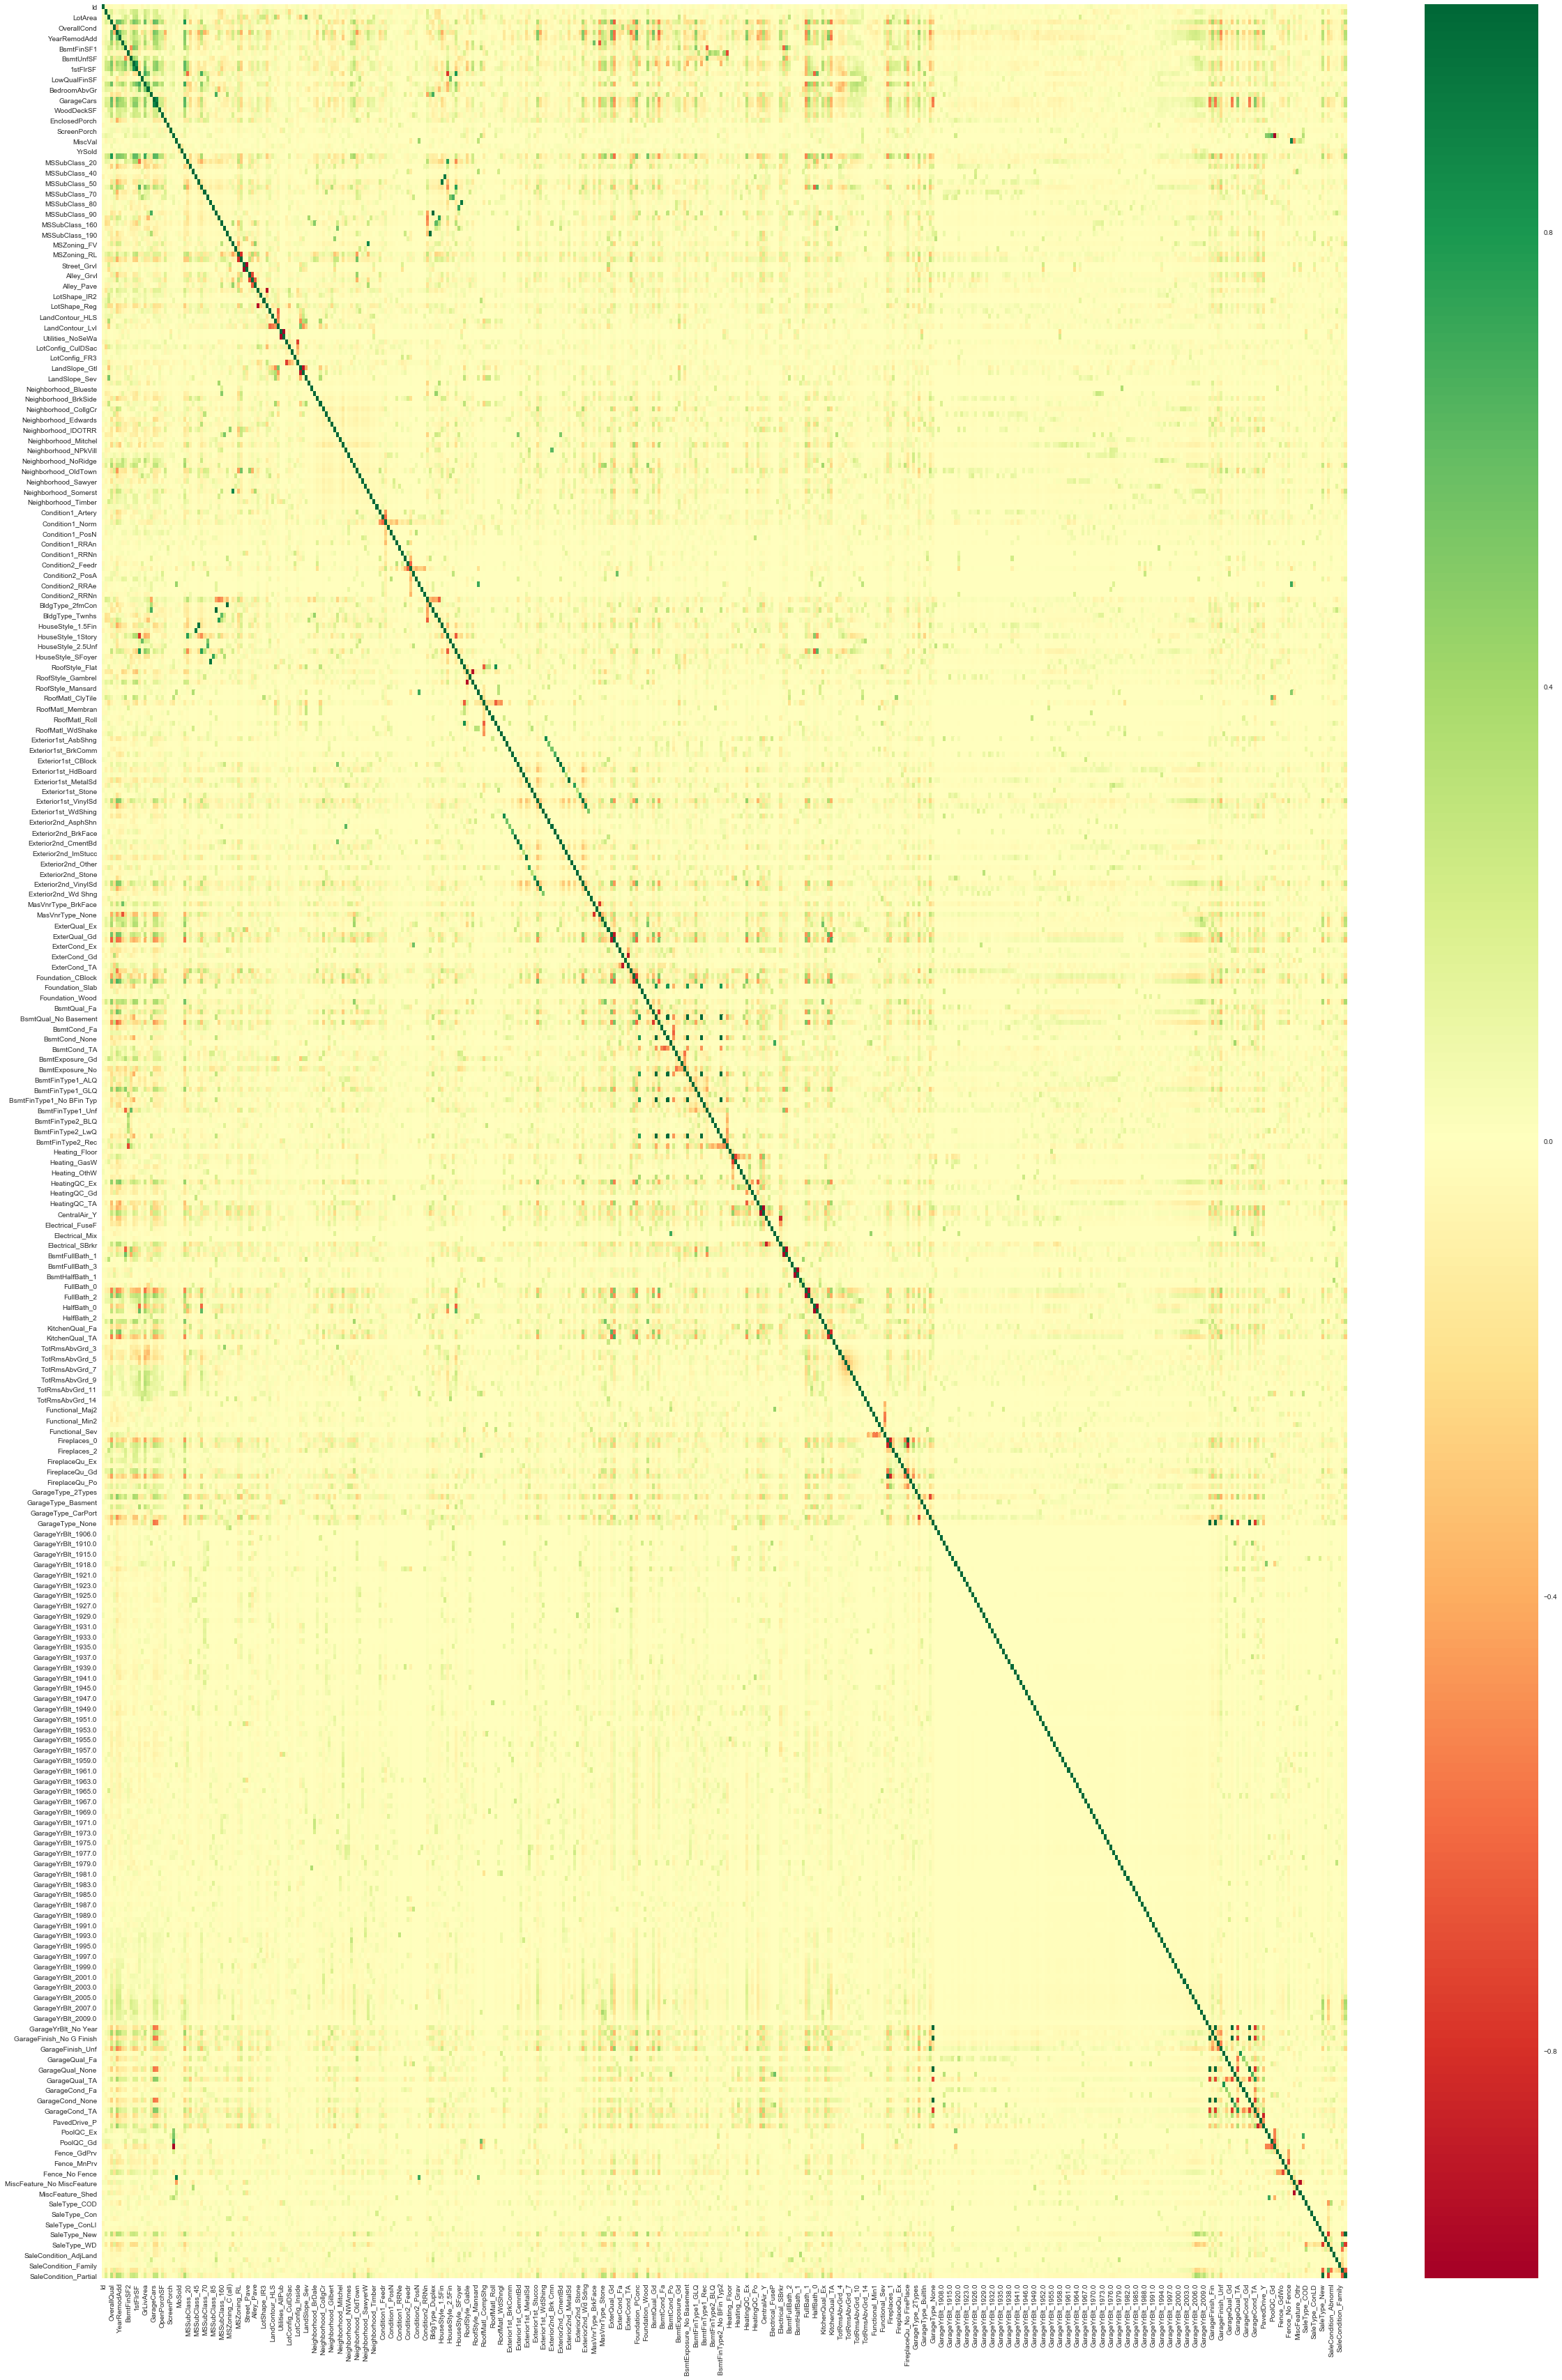

In [19]:
sns.set()
fig, ax = plt.subplots(figsize=(40,60))
sns.heatmap(hp_trans_corr,cmap='RdYlGn',ax=ax)
plt.show()

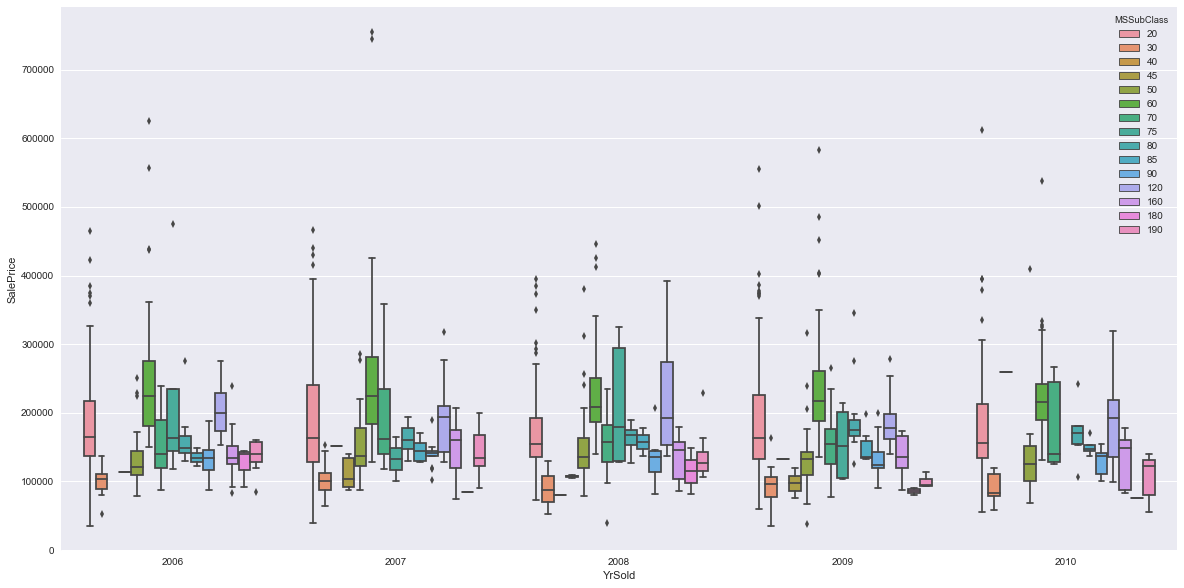

In [119]:
##Year Sold Vs House Pricing with color indexed to MSSubClass
sns.set()
fig=plt.figure(figsize=(20,10))
ax=sns.boxplot(x='YrSold',y='SalePrice',data=hp_mod,hue='MSSubClass')
plt.show()

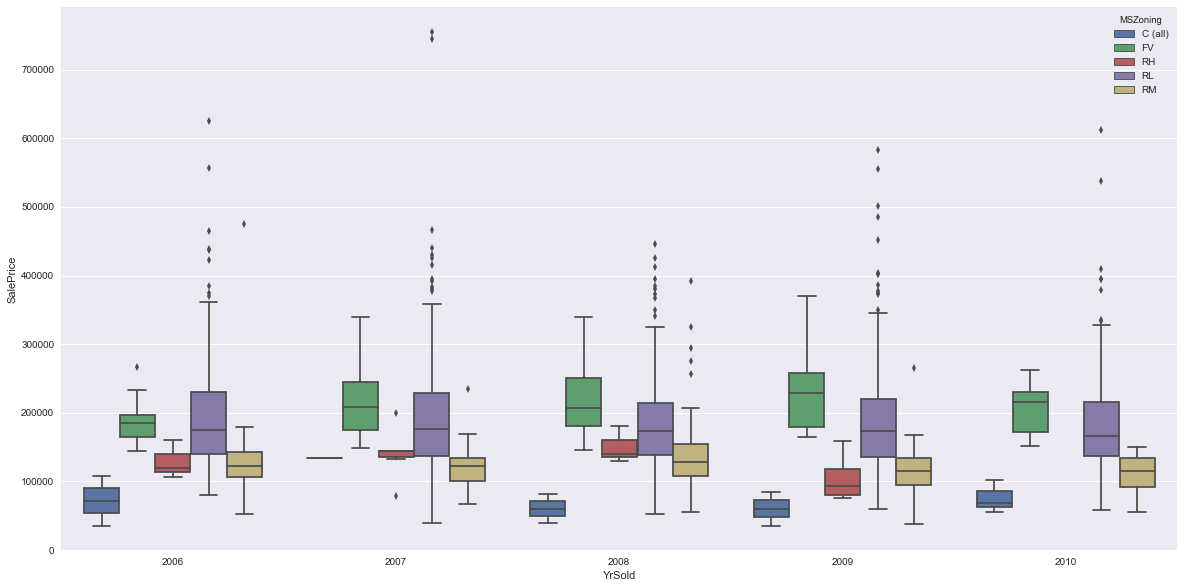

In [120]:
##Year Sold Vs House Pricing.Color indexed: MSZoning
sns.set()
fig=plt.figure(figsize=(20,10))
ax=sns.boxplot(x='YrSold',y='SalePrice',data=hp_mod,hue='MSZoning')
plt.show()

In [26]:
MSZ_Cnt=len(hp_mod.Id)

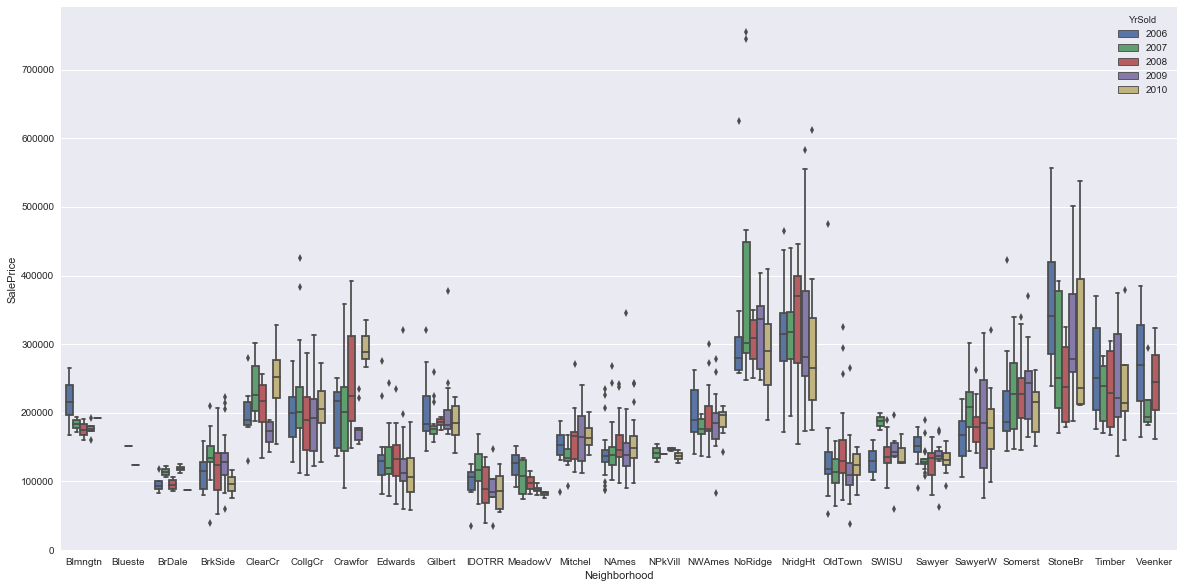

In [33]:
##Neighbourhood Vs House Pricing with color indexed to MSSubClass
sns.set()
fig=plt.figure(figsize=(20,10))
ax=sns.boxplot(x='Neighborhood',y='SalePrice',order=Desc,data=hp_mod,hue='YrSold')
plt.show()

In [61]:
?sns.boxplot

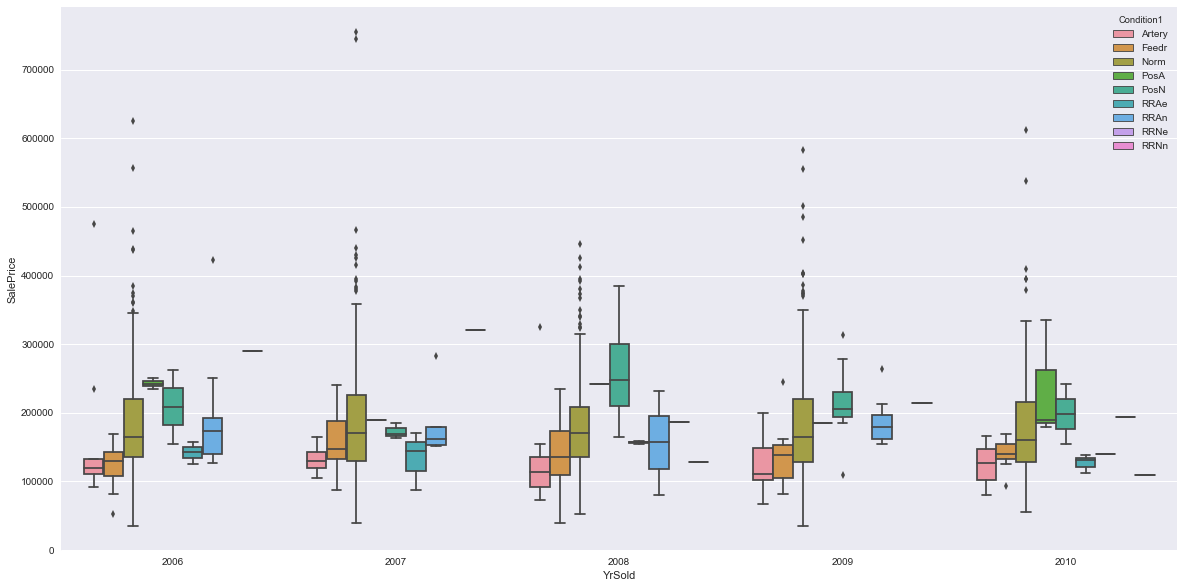

In [35]:
##Condition1 Vs House Pricing with color indexed to Condition1
sns.set()
fig=plt.figure(figsize=(20,10))
ax=sns.boxplot(x='YrSold',y='SalePrice',data=hp_mod,hue='Condition1')
plt.show()

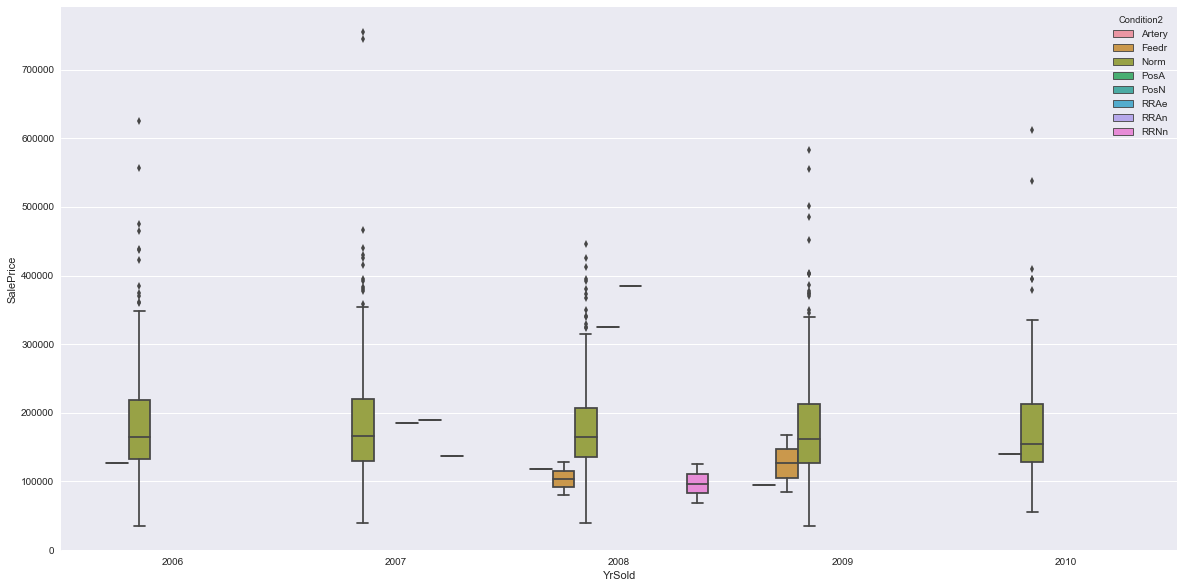

In [36]:
##YrSol Vs House Pricing. Color index: Condition2
sns.set()
fig=plt.figure(figsize=(20,10))
ax=sns.boxplot(x='YrSold',y='SalePrice',data=hp_mod,hue='Condition2')
plt.show()

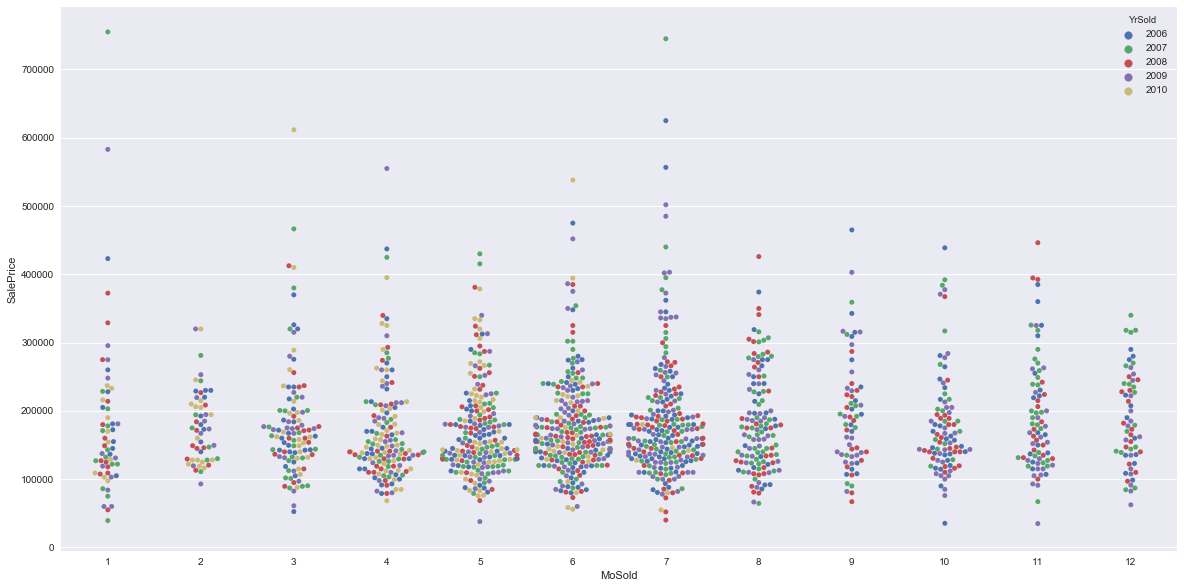

In [53]:
##Monthly Sales Vs House Pricing
sns.set()
fig=plt.figure(figsize=(20,10))
#ax=sns.boxplot(x='YrSold',y='SalePrice',data=hp)
ax2=sns.swarmplot(x='MoSold',y='SalePrice',data=hp_mod,hue='YrSold')
plt.show()

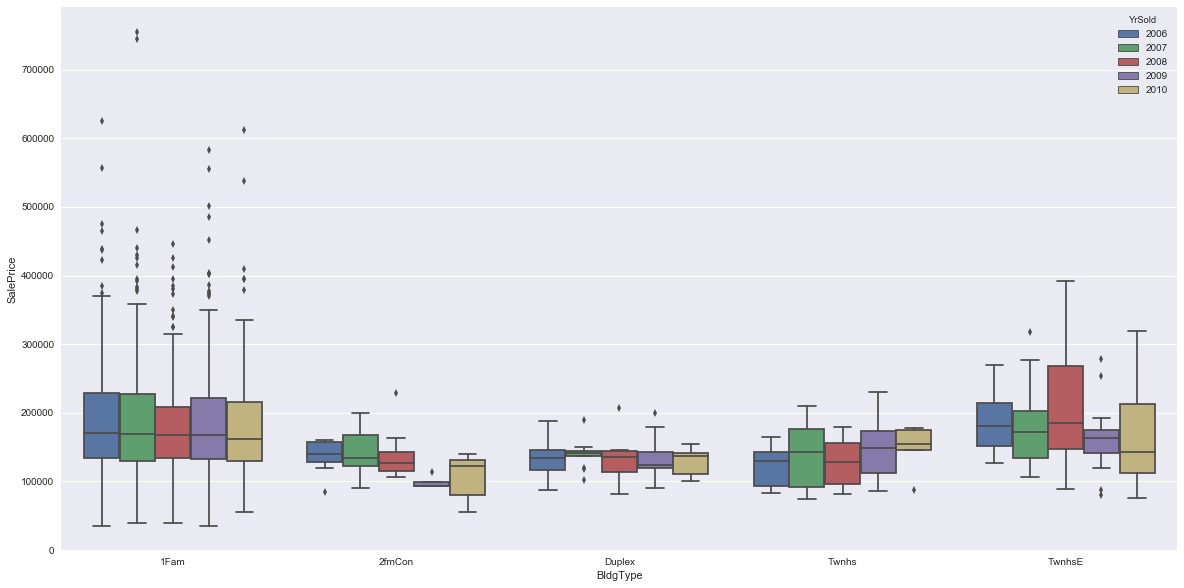

In [38]:
##BldgTyp Vs House Pricing. Color index: Condition2
sns.set()
fig=plt.figure(figsize=(20,10))
ax=sns.boxplot(x='BldgType',y='SalePrice',data=hp_mod,hue='YrSold')
plt.show()

In [85]:
YrBlt_1970=hp_mod.YearBuilt[hp.YearBuilt>1970]

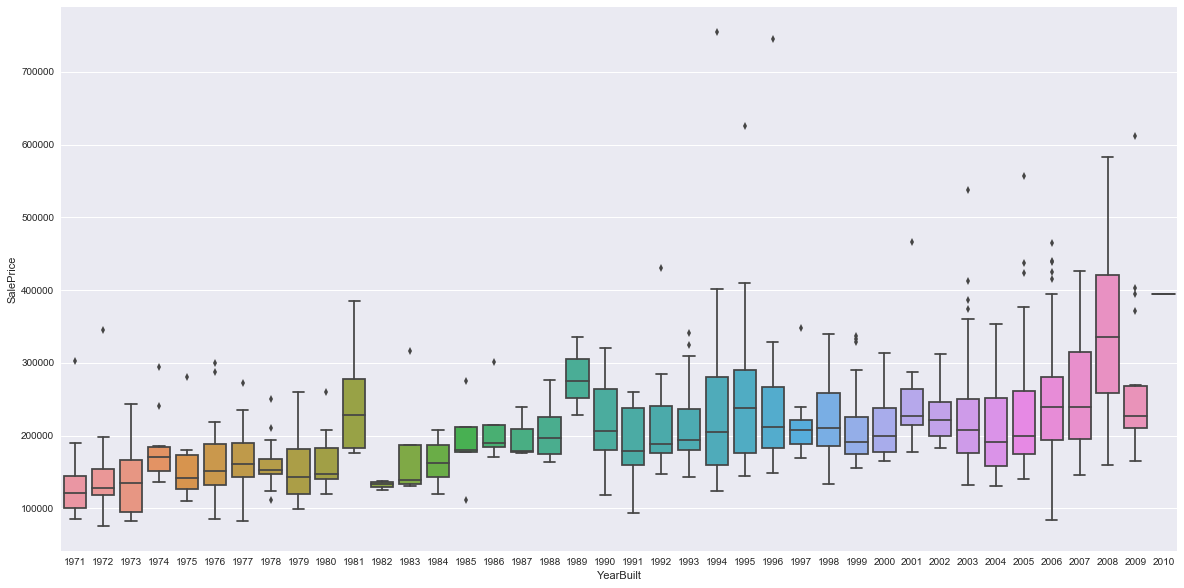

In [86]:
##YearBuilt Vs House Pricing
sns.set()
fig=plt.figure(figsize=(20,10))
#ax=sns.boxplot(x='PoolArea',y='SalePrice',data=hp)
ax2=sns.boxplot(x=YrBlt_1970,y=hp_mod.SalePrice)
plt.show()

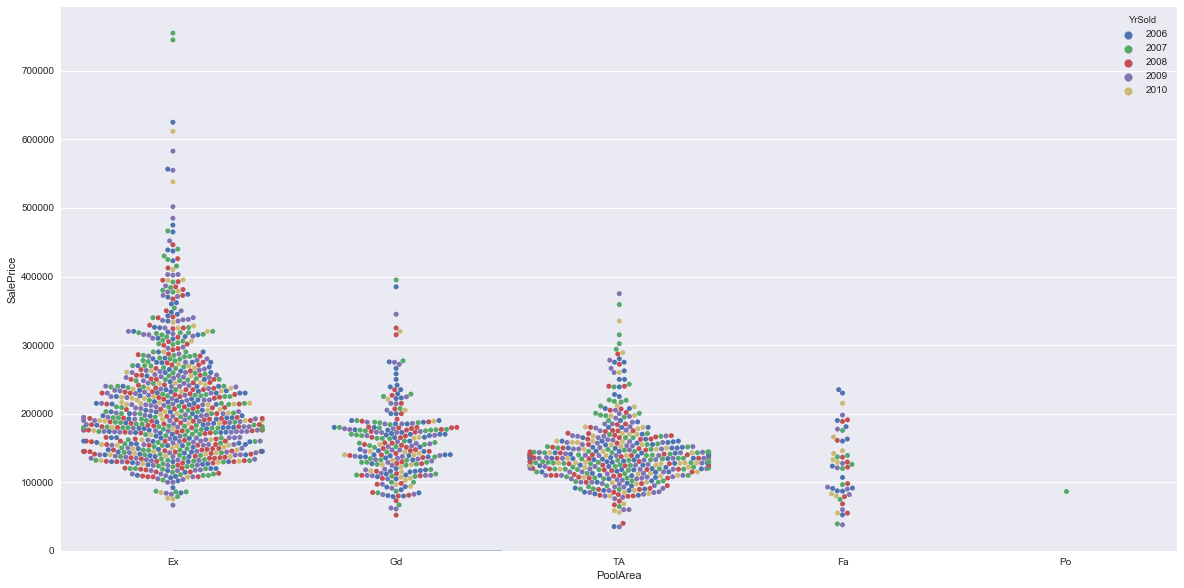

In [84]:
##HeatingQC Vs House Pricing
sns.set()
fig=plt.figure(figsize=(20,10))
#ax=sns.boxplot(x='PoolArea',y='SalePrice',data=hp)
ax2=sns.swarmplot(x='HeatingQC',y='SalePrice',data=hp_mod,hue='YrSold')
ax3=sns.distplot(hp.PoolArea,bins=500,kde=False)
plt.show()

In [154]:
len(hp[hp.ScreenPorch>0])

116

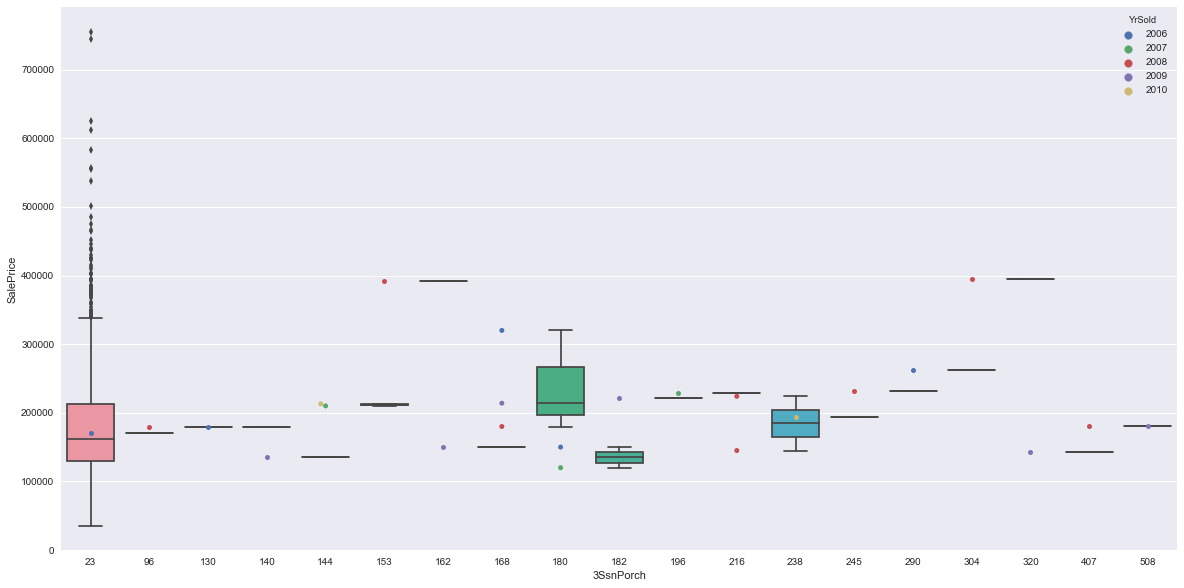

In [83]:
##3SsnPorch Vs House Pricing
sns.set()
fig=plt.figure(figsize=(20,10))
ax=sns.boxplot(x='3SsnPorch',y='SalePrice',data=hp_mod)
ax2=sns.swarmplot(x='3SsnPorch',y='SalePrice',data=hp_mod[hp_mod['3SsnPorch']>0],hue='YrSold')
plt.show()

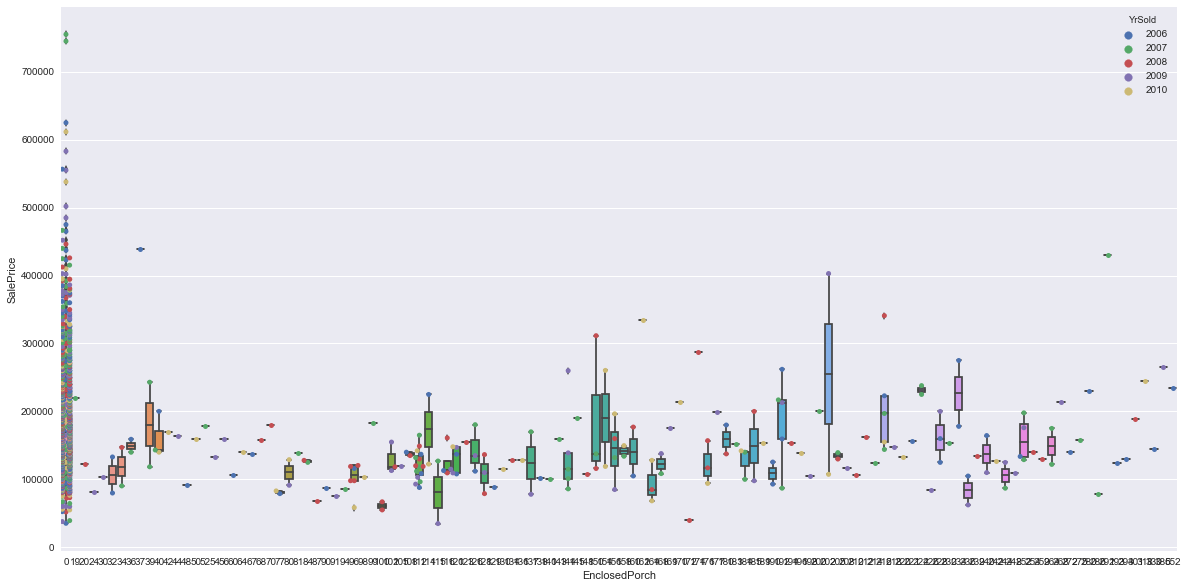

In [82]:
##EnclosedPorch Vs House Pricing
sns.set()
fig=plt.figure(figsize=(20,10))
ax=sns.boxplot(x='EnclosedPorch',y='SalePrice',data=hp_mod)
ax2=sns.swarmplot(x='EnclosedPorch',y='SalePrice',data=hp_mod,hue='YrSold')
plt.show()

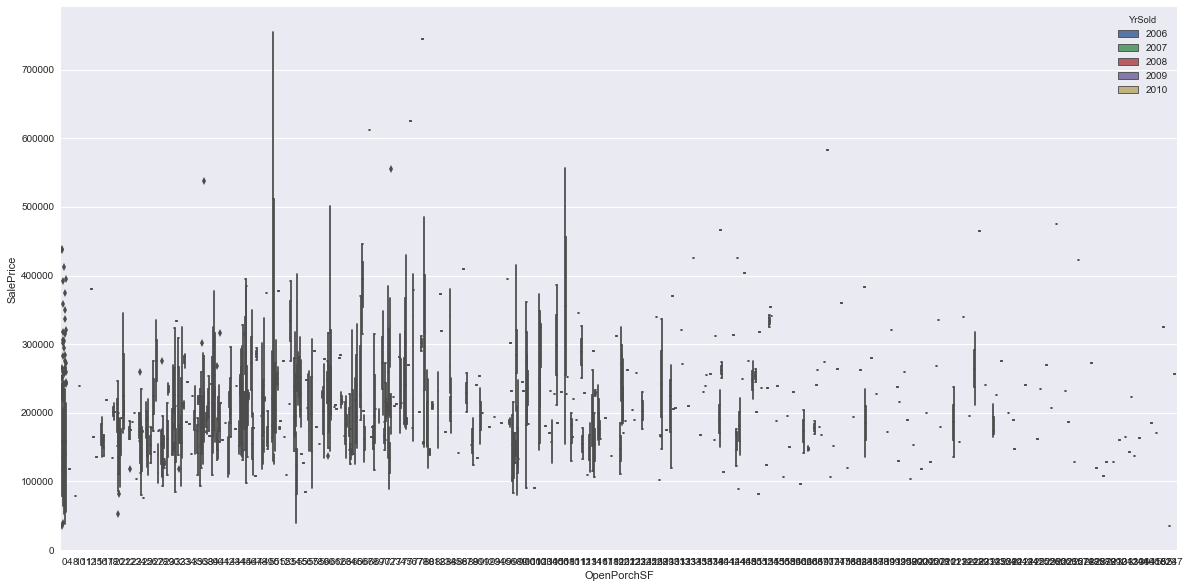

In [81]:
##OpenPorchSF Vs House Pricing
sns.set()
fig=plt.figure(figsize=(20,10))
ax=sns.boxplot(x='OpenPorchSF',y='SalePrice',data=hp_mod,hue='YrSold')
#ax2=sns.swarmplot(x='OpenPorchSF',y='SalePrice',data=hp,)
plt.show()

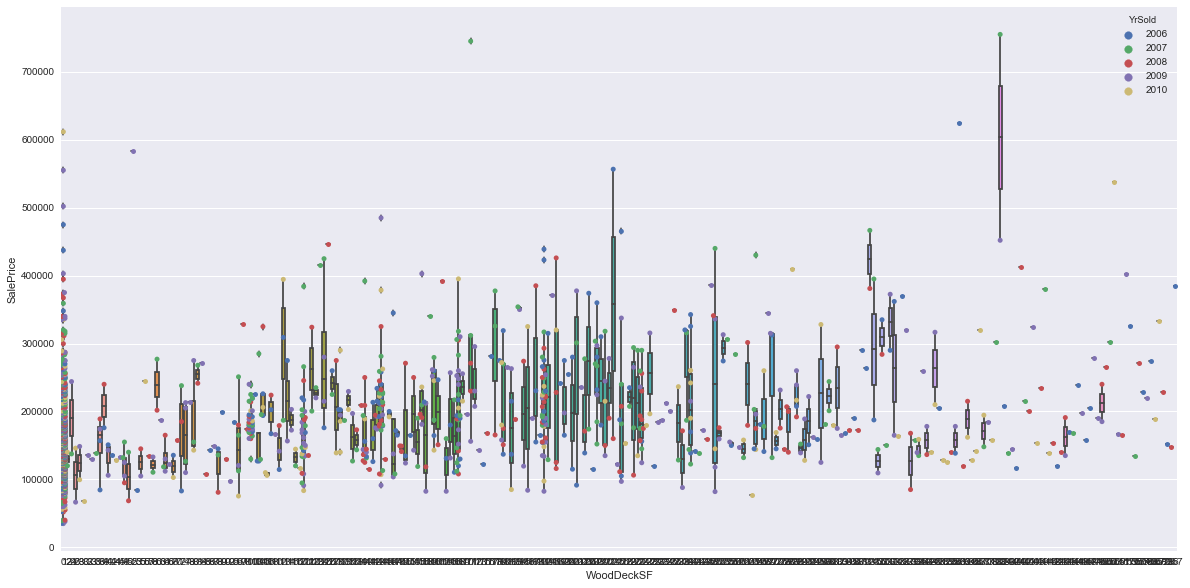

In [80]:
##WoodDeckSF Vs House Pricing
sns.set()
fig=plt.figure(figsize=(20,10))
ax=sns.boxplot(x='WoodDeckSF',y='SalePrice',data=hp_mod)
ax2=sns.swarmplot(x='WoodDeckSF',y='SalePrice',data=hp_mod,hue='YrSold')
plt.show()

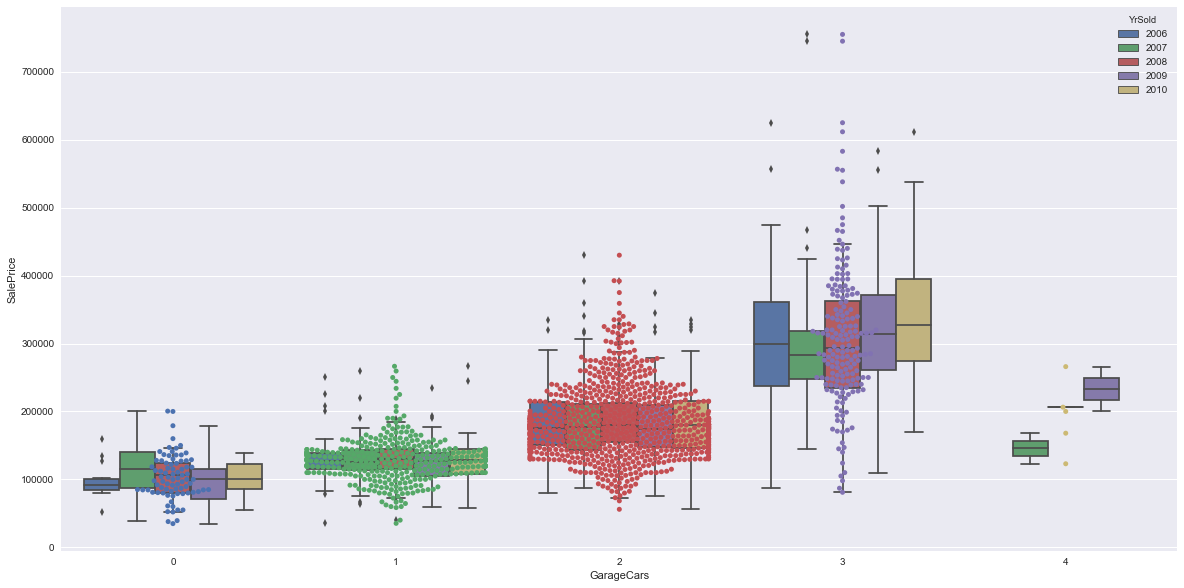

In [79]:
##Garage Cars Vs House Pricing
sns.set()
fig=plt.figure(figsize=(20,10))
ax=sns.boxplot(x='GarageCars',y='SalePrice',data=hp_mod,hue='YrSold')
ax2=sns.swarmplot(x='GarageCars',y='SalePrice',data=hp_mod)
plt.show()

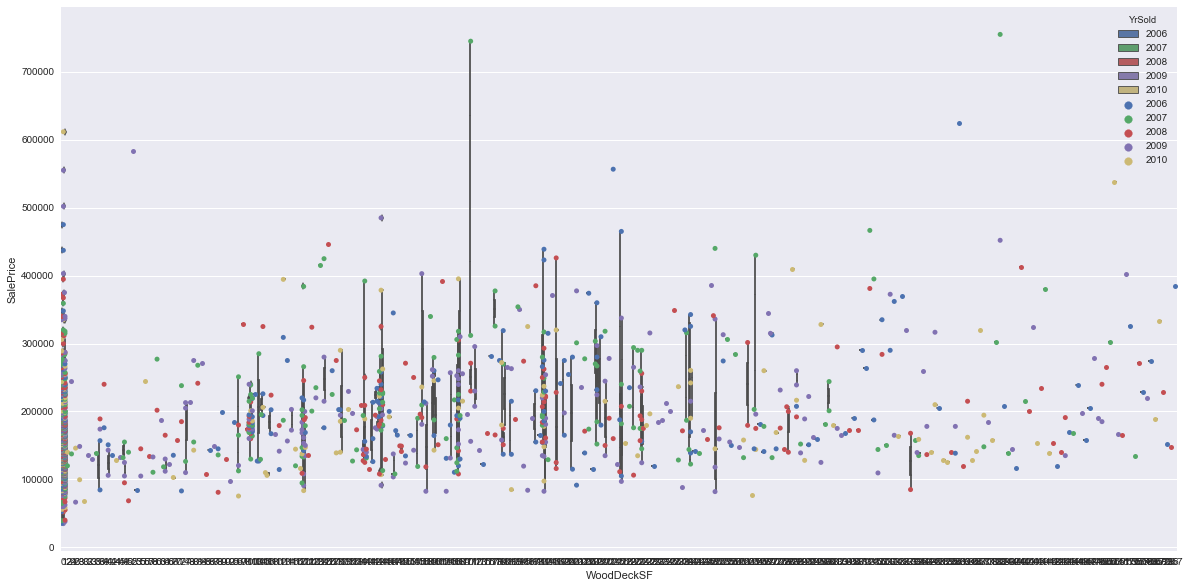

In [78]:
##WoodDeckSF Vs House Pricing
sns.set()
fig=plt.figure(figsize=(20,10))
ax=sns.boxplot(x='WoodDeckSF',y='SalePrice',data=hp_mod,hue='YrSold')
ax2=sns.swarmplot(x='WoodDeckSF',y='SalePrice',data=hp_mod,hue='YrSold')
plt.show()

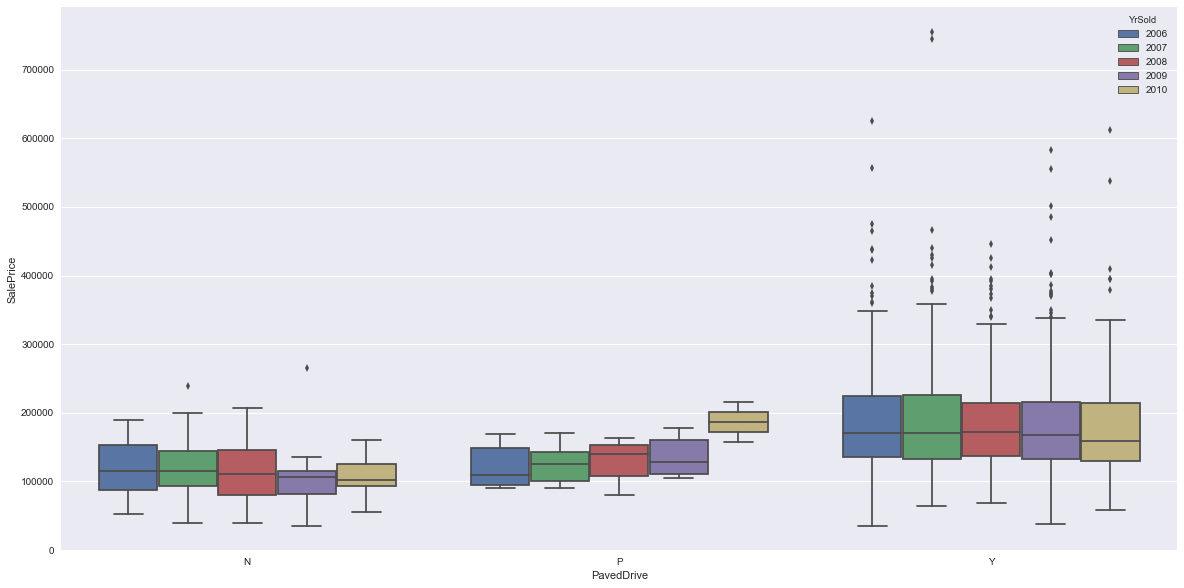

In [77]:
##Paved Drive Vs House Pricing
sns.set()
fig=plt.figure(figsize=(20,10))
ax=sns.boxplot(x='PavedDrive',y='SalePrice',data=hp_mod,hue='YrSold')
#ax2=sns.swarmplot(x='PavedDrive',y='SalePrice',data=hp)
plt.show()

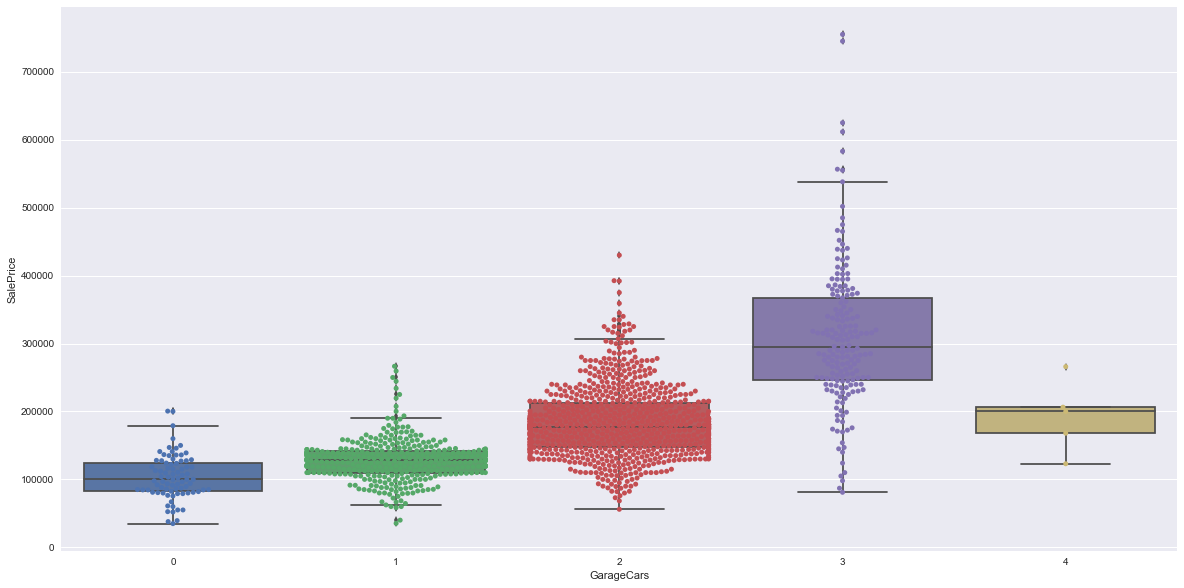

In [76]:
##Garage Cars Vs House Pricing
sns.set()
fig=plt.figure(figsize=(20,10))
ax=sns.boxplot(x='GarageCars',y='SalePrice',data=hp_mod)
ax2=sns.swarmplot(x='GarageCars',y='SalePrice',data=hp_mod)
plt.show()

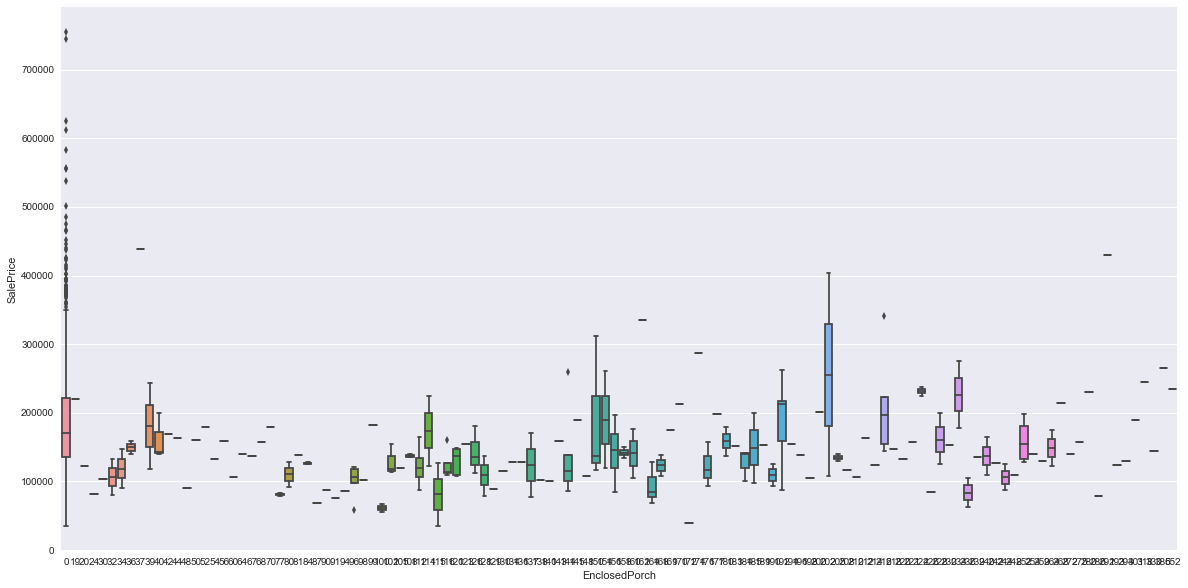

In [75]:
##MiscVal Vs House Pricing
sns.set()
fig=plt.figure(figsize=(20,10))
#ax=sns.boxplot(x='YrSold',y='SalePrice',data=hp)
ax2=sns.boxplot(x='EnclosedPorch',y='SalePrice',data=hp_mod)
plt.show()

In [360]:
#Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np

In [361]:
# Centering and Scaling data
hp_scaled=preprocessing.scale(hp_trans)
pca=PCA()
pca.fit(hp_scaled)
pca_data=pca.transform(hp_scaled)
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]

In [362]:
pca.explained_variance_ratio_*100

array([  4.86958875e+00,   2.28683922e+00,   1.86450352e+00,
         1.75691308e+00,   1.60579431e+00,   1.44145125e+00,
         1.15797117e+00,   1.13303899e+00,   9.76287803e-01,
         9.32624068e-01,   9.08045390e-01,   8.84436352e-01,
         8.56237627e-01,   7.99200903e-01,   7.86525039e-01,
         7.53623015e-01,   7.32420607e-01,   7.16528327e-01,
         6.94853831e-01,   6.89550520e-01,   6.69959538e-01,
         6.53659623e-01,   6.45853473e-01,   6.40381816e-01,
         6.29247299e-01,   6.15253345e-01,   5.99415583e-01,
         5.94083952e-01,   5.91728288e-01,   5.83812913e-01,
         5.74476507e-01,   5.67063314e-01,   5.61730664e-01,
         5.53089125e-01,   5.48536385e-01,   5.36354128e-01,
         5.33107902e-01,   5.23674773e-01,   5.22178288e-01,
         5.19819409e-01,   5.12350041e-01,   5.06925377e-01,
         4.97236070e-01,   4.92690017e-01,   4.81276820e-01,
         4.80865439e-01,   4.71631481e-01,   4.64602772e-01,
         4.55770594e-01,

In [364]:
pca.explained_variance_ratio_.cumsum()*100

array([   4.86958875,    7.15642797,    9.02093148,   10.77784456,
         12.38363887,   13.82509012,   14.98306129,   16.11610028,
         17.09238808,   18.02501215,   18.93305754,   19.81749389,
         20.67373152,   21.47293242,   22.25945746,   23.01308048,
         23.74550109,   24.46202941,   25.15688324,   25.84643376,
         26.5163933 ,   27.17005293,   27.8159064 ,   28.45628821,
         29.08553551,   29.70078886,   30.30020444,   30.89428839,
         31.48601668,   32.06982959,   32.6443061 ,   33.21136942,
         33.77310008,   34.32618921,   34.87472559,   35.41107972,
         35.94418762,   36.46786239,   36.99004068,   37.50986009,
         38.02221013,   38.52913551,   39.02637158,   39.5190616 ,
         40.00033841,   40.48120385,   40.95283533,   41.41743811,
         41.8732087 ,   42.32634381,   42.77818128,   43.22545005,
         43.66539014,   44.10043487,   44.53287756,   44.96462361,
         45.38637935,   45.80061376,   46.21430529,   46.62464

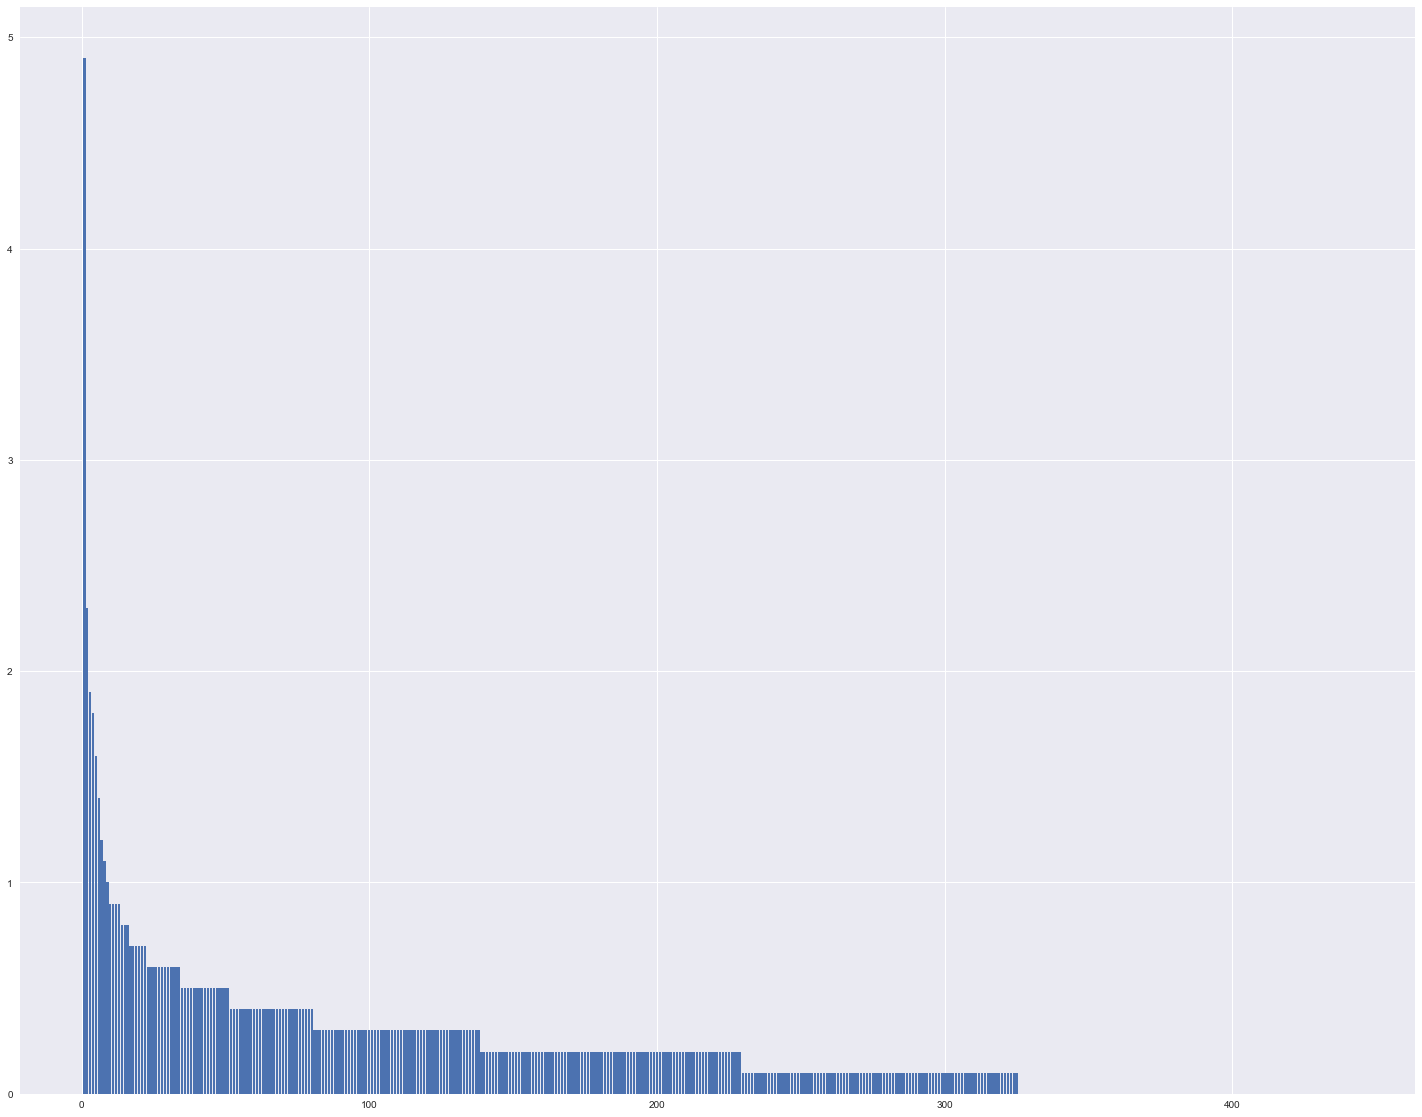

In [245]:
# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")
sns.set()
plt.figure(figsize=(25,20))
plt.bar(x=range(1,len(per_var)+1),height=per_var)
plt.show()

sns.set()
plt.figure(figsize=(20,10))
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('PCS Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
plt.show()

In [365]:
pd.Series(pca.components_[0]).abs().sort_values(ascending=False)[0:200].values

array([ 0.18017742,  0.17353607,  0.17191441,  0.15773226,  0.15479482,
        0.15206792,  0.14736944,  0.14601814,  0.14108592,  0.13466509,
        0.13427665,  0.13194901,  0.12569391,  0.1254038 ,  0.12269806,
        0.11903865,  0.11614603,  0.11457787,  0.1139466 ,  0.11364061,
        0.11359517,  0.11182368,  0.11062413,  0.10605966,  0.1056526 ,
        0.10555916,  0.10443487,  0.10318381,  0.10145037,  0.10145037,
        0.09967967,  0.09669341,  0.09527124,  0.09367926,  0.09309141,
        0.09195409,  0.09195409,  0.08981853,  0.08949837,  0.08879836,
        0.08865203,  0.08597185,  0.08553684,  0.08430958,  0.08409039,
        0.08409039,  0.08409039,  0.08409039,  0.08409039,  0.08215597,
        0.08175469,  0.07743542,  0.07658482,  0.07533766,  0.07451108,
        0.0739245 ,  0.07327731,  0.07260486,  0.07172972,  0.0699412 ,
        0.06908079,  0.06885262,  0.06866205,  0.06814695,  0.06793106,
        0.06659152,  0.06626787,  0.06607627,  0.06542163,  0.06

In [1]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
import sklearn.linear_model as sklm
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.grid_search import GridSearchCV

C:\Users\habsa\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\habsa\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [59]:
y=hp_trans[['SalePrice']]
X=hp_trans.iloc[:,:300]

In [60]:
#Creating the Train, Test data split using train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)

In [61]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
import sklearn.linear_model as sklm
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.grid_search import GridSearchCV

In [62]:
# Creaing a OLS Linear Regression Object and training the model:
lm=sklm.LinearRegression()
fit1=lm.fit(X_train,y_train)
pred1=lm.predict(X_test)
score1=lm.score(X_test,y_test)
mse=mean_squared_error(y_test,pred1)
r2score=r2_score(y_test,pred1)
coeffs=lm.coef_
print('Linear Regression Score: {}'.format(score1))
print('Mean Squared Error: {}'.format(mse))
print('R2 Score: {}'.format(r2score))
#print('Coefficients: {}'.format(coeffs))
#Using crors validation on the above model
score1_1=cross_val_score(lm,X,y,cv=10)
print('Cross Validated-Linear Regression Score: {}'.format(score1_1.mean()))

Linear Regression Score: 1.0
Mean Squared Error: 3.3844151418813466e-21
R2 Score: 1.0
Cross Validated-Linear Regression Score: 1.0


In [63]:
# Creaing a RIDGE Linear Regression Object and training the model
lm=sklm.Ridge(alpha=10)
fit1=lm.fit(X_train,y_train)
pred1=lm.predict(X_test)
score1=lm.score(X_test,y_test)
mse=mean_squared_error(y_test,pred1)
r2score=r2_score(y_test,pred1)
coeffs=lm.coef_
print('Linear Regression Score: {}'.format(score1))
print('Mean Squared Error: {}'.format(mse))
print('R2 Score: {}'.format(r2score))
print('Coefficients: {}'.format(coeffs))


#Using crors validation on the above model
score1_1=cross_val_score(lm,X,y,cv=10)
print('Cross Validated-Linear Regression Score: {}'.format(score1_1.mean()))

Linear Regression Score: 1.0
Mean Squared Error: 4.828574474762331e-13
R2 Score: 1.0
Coefficients: [[ -2.84669882e-12   3.68134001e-10   9.66066494e-12   1.83403869e-07
    1.06954022e-07   6.86627071e-09   1.55435829e-09   4.96492626e-10
   -2.51988884e-07  -2.52038751e-07  -2.52172617e-07   2.52513932e-07
    2.63126174e-07   2.63240127e-07   2.62918457e-07  -2.62272756e-07
   -1.15233703e-08  -9.49867735e-08   3.86919642e-08   5.19418921e-10
    4.18713234e-10   1.93054241e-11   4.95411003e-12   6.29563462e-10
    5.18246399e-10   7.18433414e-10  -3.52523293e-12  -6.45629130e-09
   -9.76564330e-09   1.00000000e+00   1.67113733e-08   1.88578146e-08
    1.78148344e-08   4.30722916e-08   3.57690073e-08   4.17331448e-08
    8.54533357e-08  -9.21415059e-09   8.69770918e-09  -3.65012247e-08
   -6.19989903e-08  -9.56675812e-09  -9.92727821e-08  -1.84053469e-08
   -3.29655818e-08  -1.96354055e-07   1.49167336e-07  -1.06469576e-08
    5.42392859e-08   3.35923918e-09  -1.13645248e-07   1.1364